In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
#import the kmeans model
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#we will see the use of this function in the code

In [3]:
"""
in this exercise we are trying to cluster the iris dataset
"""
df = pd.read_csv('C:/Users/mobidata/Desktop/analyse/test/iris_dataset.csv', decimal = '.', sep = ',')
#the iris dataset is a famous dataset in which we have collected informations about the width and the length of the sepal and the petal of iris flowers

In [60]:
df

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.138728,3.470118,1.441015,1.094873,setosa
1,2,4.849873,3.034931,1.414931,0.968687,setosa
2,3,4.715843,3.239083,1.295309,1.006643,setosa
3,4,4.603747,NaN,1.480616,1.002344,setosa
4,5,4.988744,3.645049,1.417527,1.122947,setosa
...,...,...,...,...,...,...
145,146,6.664208,2.994751,5.219754,3.061857,virginica
146,147,6.319889,2.453381,5.035004,2.536681,virginica
147,148,6.488279,2.989227,5.203232,2.749461,virginica
148,149,6.228777,3.371570,5.416274,3.153742,virginica


In [61]:
df.drop('id', axis = 'columns', inplace = True)
#when we dont use inplace the drop function return the result we want, but it's not applied on the real dataset
#when we use inplace the changes are made inplace

In [62]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.138728,3.470118,1.441015,1.094873,setosa
1,4.849873,3.034931,1.414931,0.968687,setosa
2,4.715843,3.239083,1.295309,1.006643,setosa
3,4.603747,NaN,1.480616,1.002344,setosa
4,4.988744,3.645049,1.417527,1.122947,setosa
...,...,...,...,...,...
145,6.664208,2.994751,5.219754,3.061857,virginica
146,6.319889,2.453381,5.035004,2.536681,virginica
147,6.488279,2.989227,5.203232,2.749461,virginica
148,6.228777,3.371570,5.416274,3.153742,virginica


In [45]:
'''
the exercice we are going to do is to cluster this dataset using petal length and width 
so im going to drop the other columns because im not going to need them
'''
df.drop(['sepal_length','sepal_width','species'], axis = 'columns', inplace = True)

In [46]:
df

,petal_length,petal_width
0,1.441015,1.094873
1,1.414931,0.968687
2,1.295309,1.006643
3,1.480616,1.002344
4,1.417527,1.122947
...,...,...
145,5.219754,3.061857
146,5.035004,2.536681
147,5.203232,2.749461
148,5.416274,3.153742


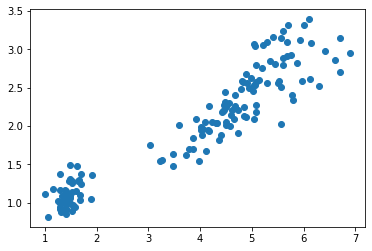

In [47]:
plt.scatter(df['petal_length'],df['petal_width'])

In [49]:
df.isnull().sum()

petal_length    0
petal_width     1
dtype: int64

In [50]:
#so we have one nan value we going to delet that row
df.dropna(axis = 'rows', how = 'any', inplace = True)

In [51]:
df.isnull().sum()

petal_length    0
petal_width     0
dtype: int64

In [52]:
km = KMeans(n_clusters = 3)
y_prediction = km.fit_predict(df)
y_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [53]:
df['cluster'] = y_prediction
df

,petal_length,petal_width,cluster
0,1.441015,1.094873,1
1,1.414931,0.968687,1
2,1.295309,1.006643,1
3,1.480616,1.002344,1
4,1.417527,1.122947,1
...,...,...,...
145,5.219754,3.061857,0
146,5.035004,2.536681,0
147,5.203232,2.749461,0
148,5.416274,3.153742,0


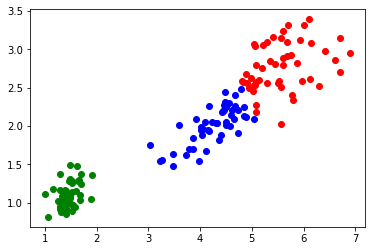

In [54]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal_length'],df1['petal_width'], color='r')
plt.scatter(df2['petal_length'],df2['petal_width'], color='g')
plt.scatter(df3['petal_length'],df3['petal_width'], color='b')
plt.show()

In [55]:
'''
we are not going to work with the scaler function because we don't need it in this case
and the data is distributed normaly
'''


"\nwe are not going to work with the scaler function because we don't need it in this case\nand the data is distributed normaly\n"

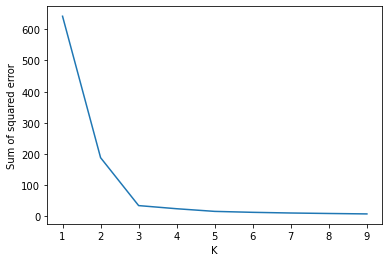

In [56]:
#keep this function close to be reused when needed, because you won't have to rewright the code, just use it
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [57]:
#that way we made sure that the right number of clusters to be used is three, remember the elbow rule